## 1. Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import math
from datetime import datetime
from datetime import timedelta


In [3]:
df = pd.read_csv('Walmart.csv.xls')
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [4]:
df.shape

(6435, 8)

In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
df.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [9]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [10]:
df.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [11]:
df['Weekly_Sales'].value_counts()

Weekly_Sales
1643690.90    1
446751.45     1
1332261.01    1
1366193.35    1
1384870.51    1
             ..
551799.63     1
573498.64     1
553901.97     1
533161.64     1
760281.43     1
Name: count, Length: 6435, dtype: int64

# Exploratory Data Analysis (EDA)

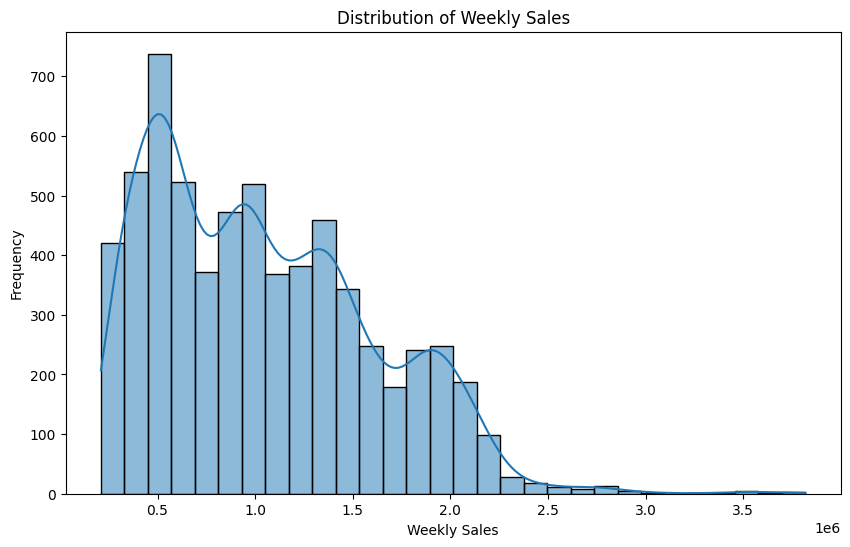

In [12]:

# Create a distribution plot for the target variable Weekly_Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], kde=True, bins=30)  # Adjust bins as needed
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

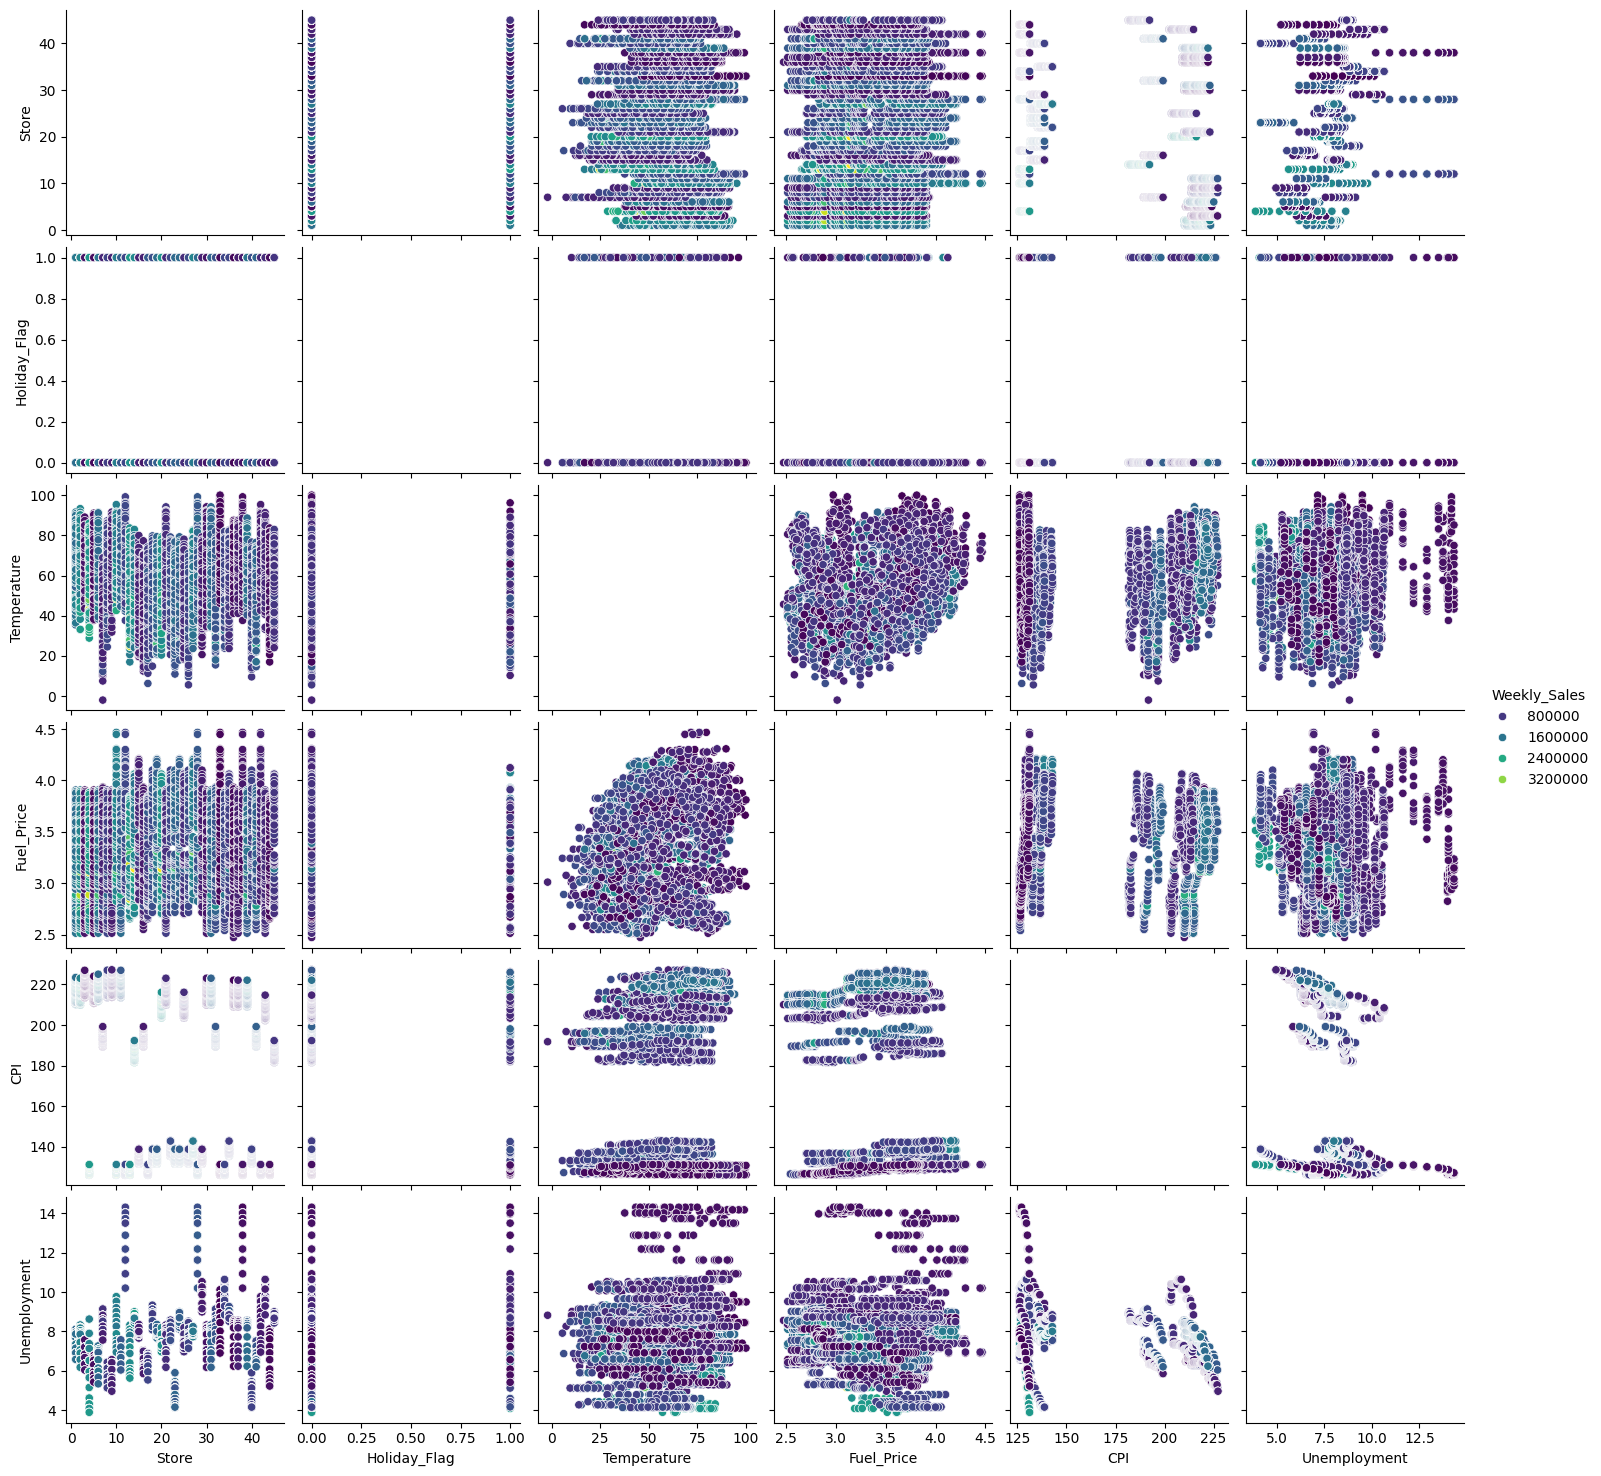

In [13]:

# the target variable is 'Weekly_Sales'.
sns.pairplot(df, hue='Weekly_Sales', palette='viridis')

# Show the plot
plt.show()

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

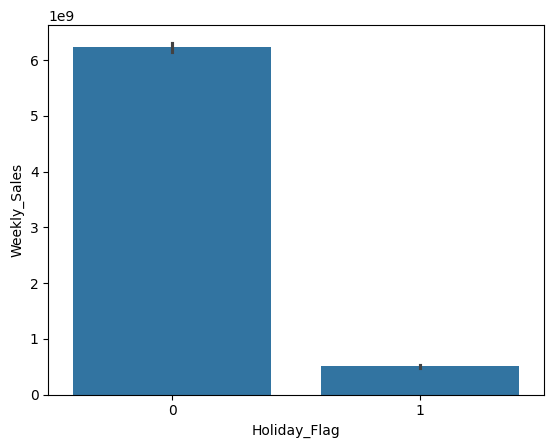

In [14]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df, estimator=np.sum)

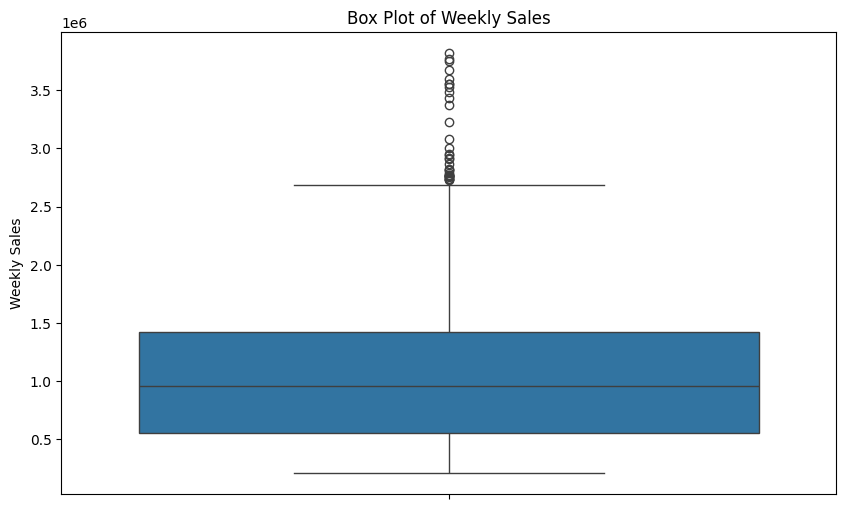

In [15]:
# Box plot of Weekly Sales 
plt.figure(figsize=(10, 6))
sns.boxplot(y='Weekly_Sales', data=df)  
plt.title('Box Plot of Weekly Sales')
plt.ylabel('Weekly Sales')
plt.show()

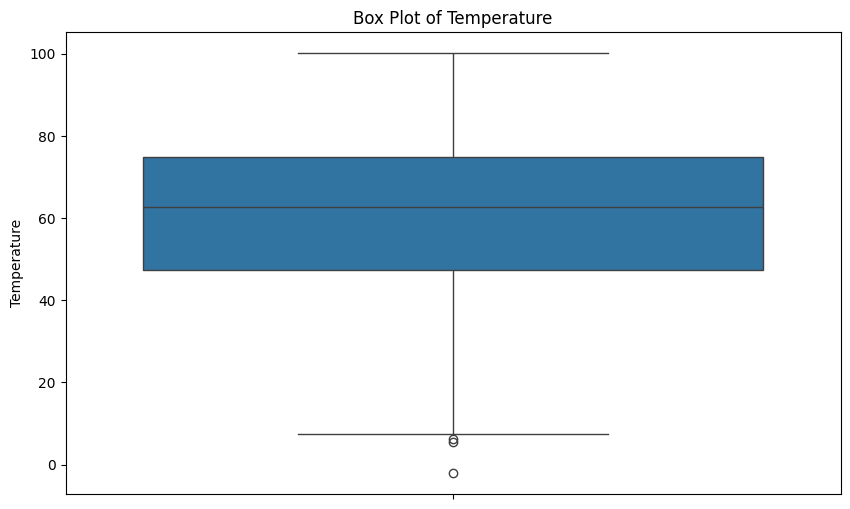

In [16]:
# Box plot of Temperature
plt.figure(figsize=(10, 6))
sns.boxplot(y='Temperature', data=df)  
plt.title('Box Plot of Temperature')
plt.ylabel('Temperature')
plt.show()

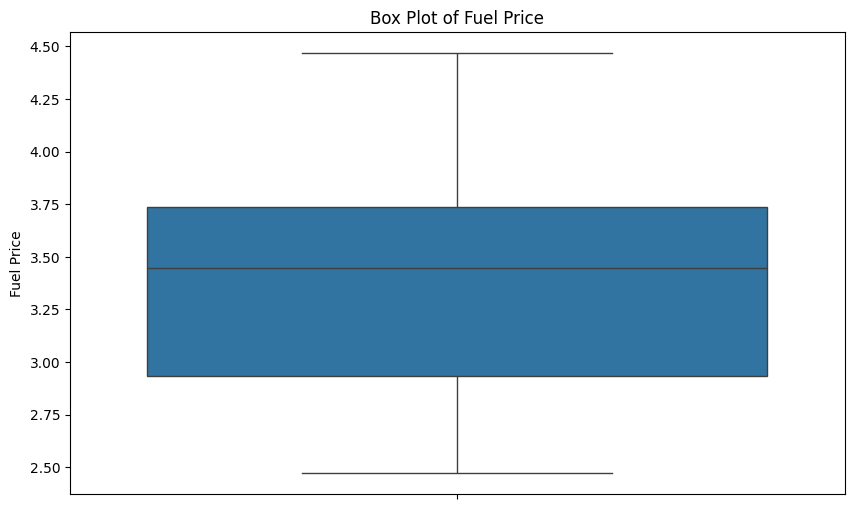

In [17]:
# Box plot of Fuel Price
plt.figure(figsize=(10, 6))
sns.boxplot(y='Fuel_Price', data=df)  
plt.title('Box Plot of Fuel Price')
plt.ylabel('Fuel Price')
plt.show()

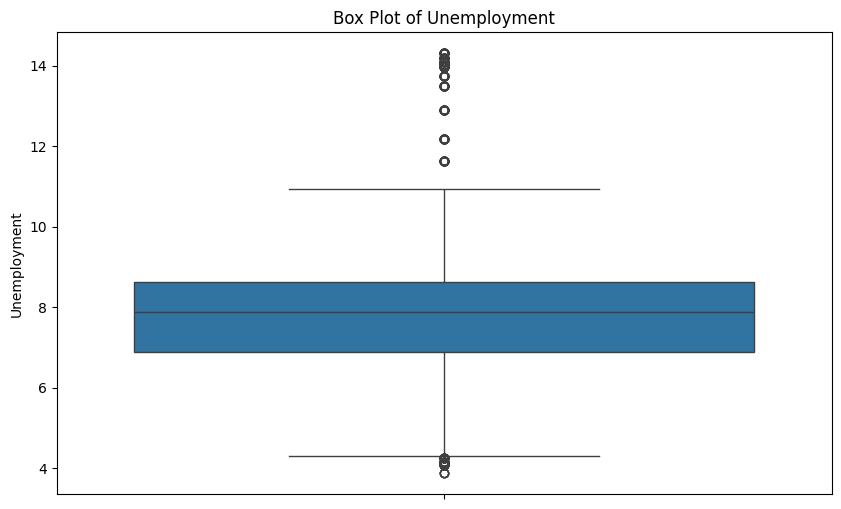

In [18]:
# Box plot of Unemployment 
plt.figure(figsize=(10, 6))
sns.boxplot(y='Unemployment', data=df)  
plt.title('Box Plot of Unemployment')
plt.ylabel('Unemployment')
plt.show()

In [19]:
df_holiday = df.loc[df['Holiday_Flag']==1]
df_holiday['Date'].unique()

array(['12-02-2010', '10-09-2010', '26-11-2010', '31-12-2010',
       '11-02-2011', '09-09-2011', '25-11-2011', '30-12-2011',
       '10-02-2012', '07-09-2012'], dtype=object)

In [20]:
df_holiday = df.loc[df['Holiday_Flag']==0]
df_holiday['Date'].unique()

array(['05-02-2010', '19-02-2010', '26-02-2010', '05-03-2010',
       '12-03-2010', '19-03-2010', '26-03-2010', '02-04-2010',
       '09-04-2010', '16-04-2010', '23-04-2010', '30-04-2010',
       '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010',
       '04-06-2010', '11-06-2010', '18-06-2010', '25-06-2010',
       '02-07-2010', '09-07-2010', '16-07-2010', '23-07-2010',
       '30-07-2010', '06-08-2010', '13-08-2010', '20-08-2010',
       '27-08-2010', '03-09-2010', '17-09-2010', '24-09-2010',
       '01-10-2010', '08-10-2010', '15-10-2010', '22-10-2010',
       '29-10-2010', '05-11-2010', '12-11-2010', '19-11-2010',
       '03-12-2010', '10-12-2010', '17-12-2010', '24-12-2010',
       '07-01-2011', '14-01-2011', '21-01-2011', '28-01-2011',
       '04-02-2011', '18-02-2011', '25-02-2011', '04-03-2011',
       '11-03-2011', '18-03-2011', '25-03-2011', '01-04-2011',
       '08-04-2011', '15-04-2011', '22-04-2011', '29-04-2011',
       '06-05-2011', '13-05-2011', '20-05-2011', '27-05

In [21]:
# Super bowl dates
df.loc[(df['Date']== '12-02-2010')|(df['Date']=='11-02-2011')|(df['Date']=='10-02-2012'), 'Super_Bowl']=True
df.loc[(df['Date']!='12-02-2010')&(df['Date']!='11-02-2011')&(df['Date']!='10-02-2012'), 'Super_Bowl']=False


C:\Users\Uzair Qureshi\AppData\Local\Temp\ipykernel_14812\430385245.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Date']== '12-02-2010')|(df['Date']=='11-02-2011')|(df['Date']=='10-02-2012'), 'Super_Bowl']=True


In [22]:
# Labour Day
df.loc[(df['Date']== '10-09-2010')|(df['Date']=='09-09-2011')|(df['Date']=='07-09-2012'), 'Labour_Day']=True
df.loc[(df['Date']!='10-09-2010')&(df['Date']!='09-09-2011')&(df['Date']!='07-09-2012'), 'Labour_Day']=False

C:\Users\Uzair Qureshi\AppData\Local\Temp\ipykernel_14812\506742485.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Date']== '10-09-2010')|(df['Date']=='09-09-2011')|(df['Date']=='07-09-2012'), 'Labour_Day']=True


In [23]:
# thanksgiving dates
df.loc[(df['Date'] =='26-11-2010')|(df['Date'] =='25-11-2011'),'Thanksgiving'] = True
df.loc[(df['Date']!= '26-11-2010')&(df['Date']!='25-11-2011'), 'Thanksgiving'] = False

C:\Users\Uzair Qureshi\AppData\Local\Temp\ipykernel_14812\2789506138.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Date'] =='26-11-2010')|(df['Date'] =='25-11-2011'),'Thanksgiving'] = True


In [24]:
# Christmas dates
df.loc[(df['Date'] =='31-12-2010')|(df['Date'] =='30-12-2011'),'Christmas'] = True 
df.loc[(df['Date']!='31-12-2010')&(df['Date']!='30-12-2011'), 'Christmas'] = False

C:\Users\Uzair Qureshi\AppData\Local\Temp\ipykernel_14812\2787301404.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Date'] =='31-12-2010')|(df['Date'] =='30-12-2011'),'Christmas'] = True


<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

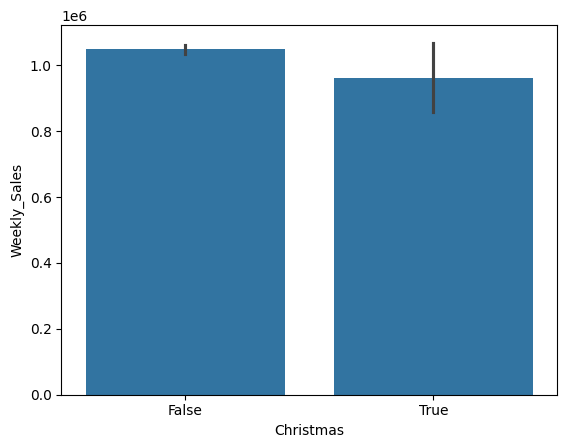

In [25]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

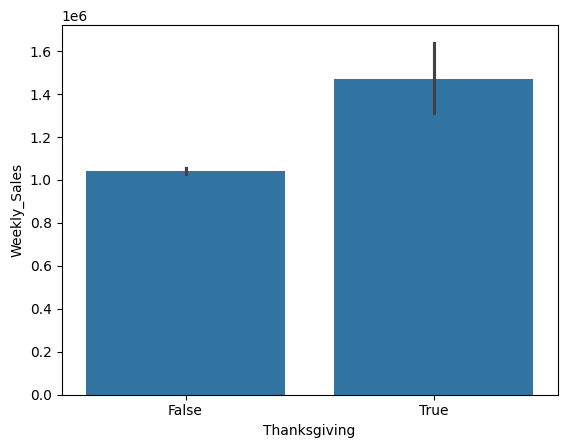

In [29]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df)   #Thanksgiving holidays and not holidays

<Axes: xlabel='Labour_Day', ylabel='Weekly_Sales'>

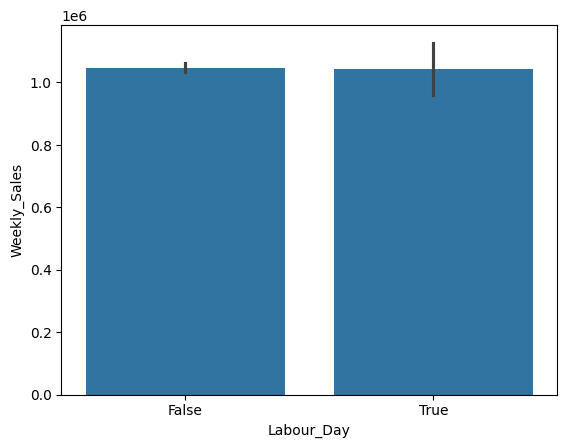

In [84]:
sns.barplot(x='Labour_Day', y='Weekly_Sales', data=df)     # Labour day holidays vs non labour days

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

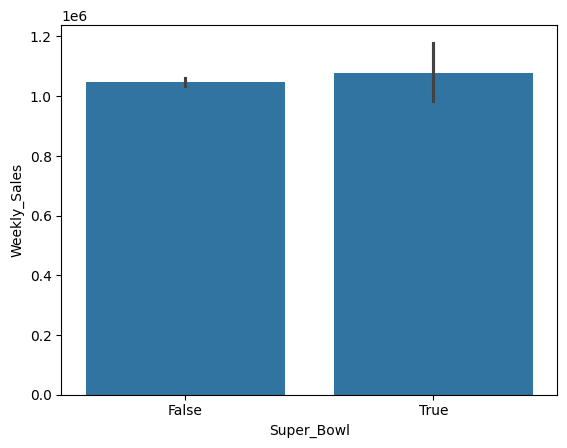

In [85]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df)     # Super Bowl holidays vs non super bowl holidays

In [88]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

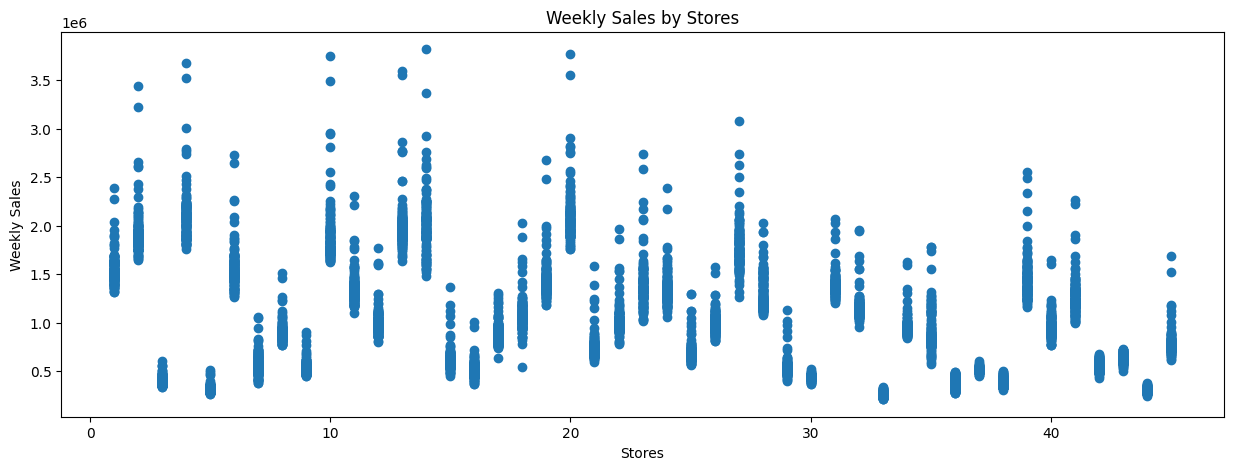

In [89]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Stores')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

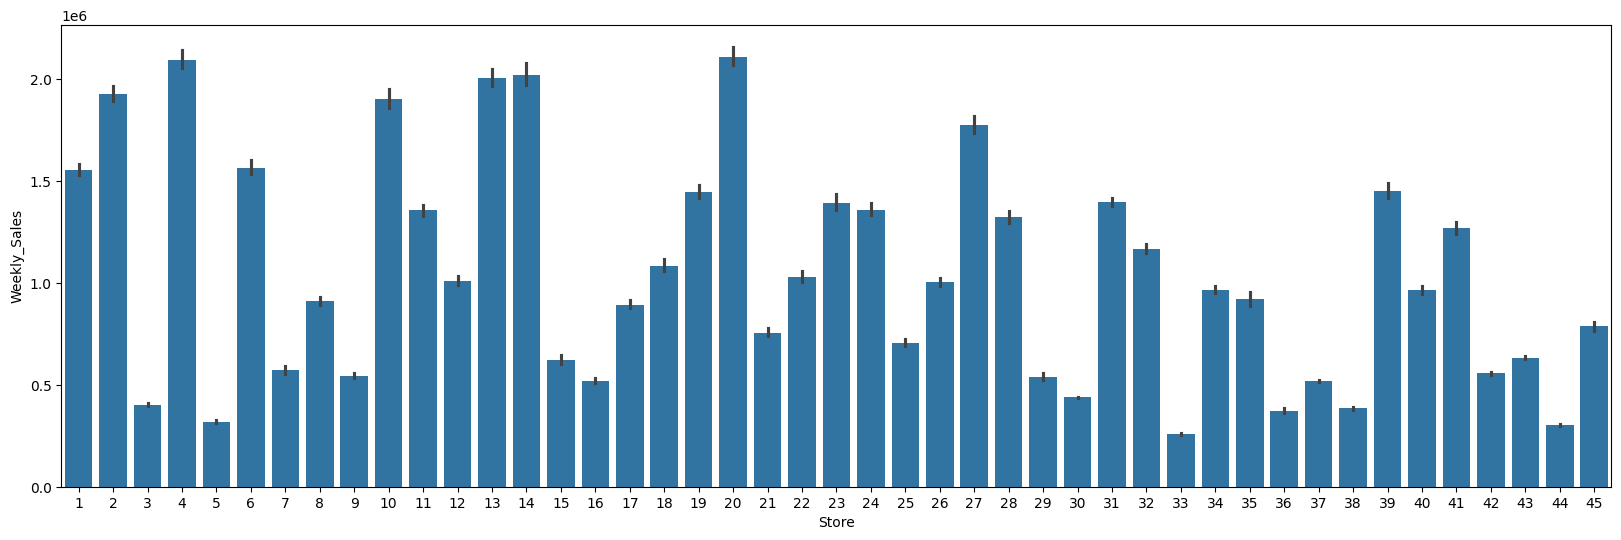

In [90]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df, estimator=np.mean)

# Data Preprocessing

In [91]:
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


### Encode Categorical Variables and Create Additional Features¶

In [30]:
# Feature Engineering
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

df['DayOfWeek'] = df['Date'].dt.dayofweek

df['Is_Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

df['Fuel_CPI_Ratio'] = df['Fuel_Price'] / df['CPI']


<Axes: xlabel='Month'>

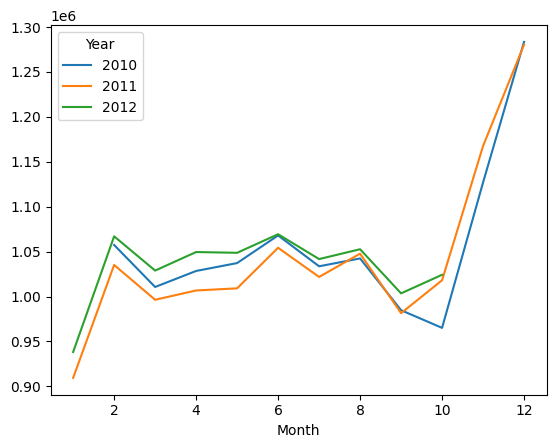

In [31]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()

<Axes: xlabel='Week'>

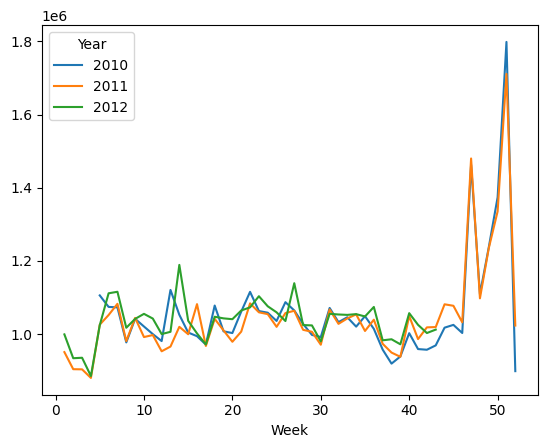

In [33]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Week")
weekly_sales.plot()

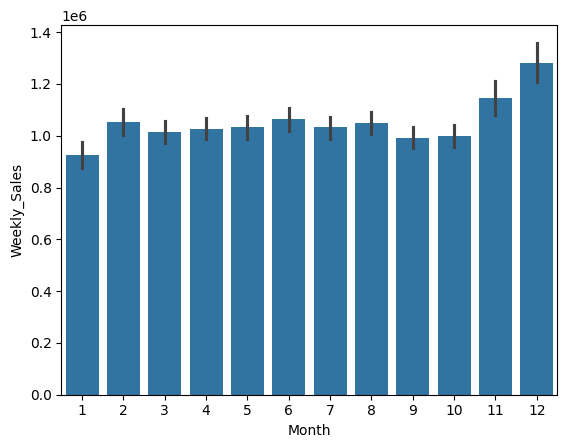

In [32]:
fig = sns.barplot(x='Month', y='Weekly_Sales', data=df)

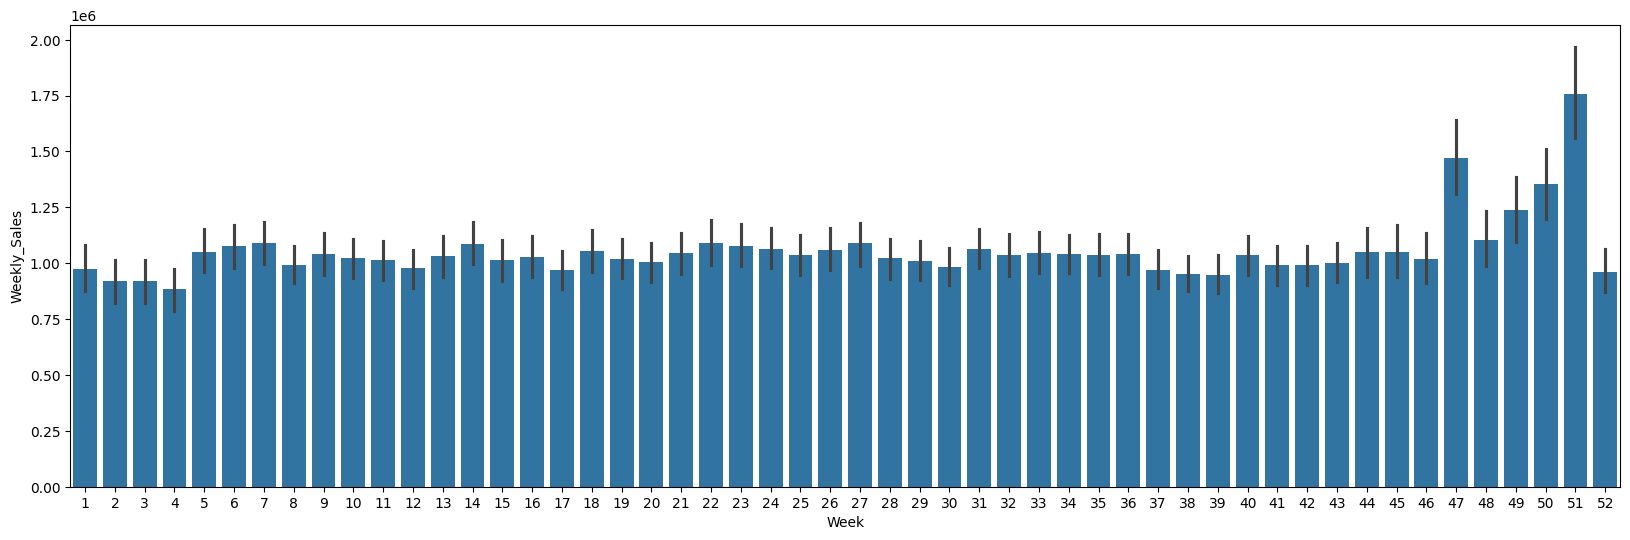

In [34]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Week', y='Weekly_Sales', data=df)

In [97]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Year,Month,Week,DayOfWeek,Is_Weekend,Fuel_CPI_Ratio
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,False,False,False,False,2010,2,5,4,0,0.012184
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,True,False,False,False,2010,2,6,4,0,0.012062
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,False,False,False,False,2010,2,7,4,0,0.011898
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,False,False,False,False,2010,2,8,4,0,0.012119
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,False,False,False,False,2010,3,9,4,0,0.012420


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [104]:
# Exploring the 'Weekly_Sales' columns for potential outliers

weeky_sales_stats = df['Weekly_Sales'].describe()

# identifying potential outliers using IQR method
Q1 = weeky_sales_stats['25%']
Q3 = weeky_sales_stats['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Counting Outliers
outliers = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]
outliers_count = outliers.shape[0]

print(weeky_sales_stats)
print(lower_bound)
print(upper_bound)
print(outliers_count)
outliers['Weekly_Sales'].sort_values().unique()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64
-746862.7275
2720371.4924999997
34


array([2727575.18, 2734277.1 , 2739019.75, 2740057.14, 2752122.08,
       2760346.71, 2762816.65, 2762861.41, 2766400.05, 2771397.17,
       2771646.81, 2789469.45, 2811634.04, 2811646.85, 2819193.17,
       2864170.61, 2906233.25, 2921709.71, 2939946.38, 2950198.64,
       3004702.33, 3078162.08, 3224369.8 , 3369068.99, 3436007.68,
       3487986.89, 3526713.39, 3555371.03, 3556766.03, 3595903.2 ,
       3676388.98, 3749057.69, 3766687.43, 3818686.45])

# Data Manipulation

In [117]:
X = df.drop(['Weekly_Sales','Date'], axis=1)
y = df['Weekly_Sales']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
X_train

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Year,Month,Week,DayOfWeek,Is_Weekend,Fuel_CPI_Ratio
1288,10,1,49.96,2.828,126.496258,9.765,True,False,False,False,2010,2,6,4,0,0.022356
1115,8,0,65.19,3.891,225.062571,5.679,False,False,False,False,2012,4,15,4,0,0.017289
582,5,0,65.30,2.808,211.038853,6.465,False,False,False,False,2010,4,15,4,0,0.013306
3647,26,0,56.94,3.851,135.265267,7.818,False,False,False,False,2011,6,25,4,0,0.028470
1564,11,0,86.49,3.638,225.829306,6.334,False,False,False,False,2012,8,35,4,0,0.016110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,27,0,39.32,3.420,137.251185,7.827,False,False,False,False,2011,2,7,4,0,0.024918
5191,37,0,54.44,2.708,210.376263,8.476,False,False,False,False,2010,12,48,4,0,0.012872
5226,37,0,86.71,3.684,214.297294,8.177,False,False,False,False,2011,8,31,4,0,0.017191
5390,38,1,44.64,3.428,130.071032,12.890,False,False,False,True,2011,12,52,4,0,0.026355


In [120]:
X_test

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Year,Month,Week,DayOfWeek,Is_Weekend,Fuel_CPI_Ratio
2436,18,0,42.39,2.805,131.784000,9.202,False,False,False,False,2010,3,10,4,0,0.021285
3361,24,0,68.88,3.964,135.265267,8.212,False,False,False,False,2011,6,25,4,0,0.029305
233,2,0,65.87,3.372,217.325182,7.441,False,False,False,False,2011,10,43,4,0,0.015516
3667,26,0,40.08,3.570,136.461806,7.598,False,False,False,False,2011,11,45,4,0,0.026161
5011,36,0,59.56,2.701,209.980321,8.554,False,False,False,False,2010,3,11,4,0,0.012863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,11,0,68.71,2.633,215.060858,7.564,False,False,False,False,2010,10,40,4,0,0.012243
6270,44,0,61.11,3.788,130.959226,5.621,False,False,False,False,2012,6,22,4,0,0.028925
4522,32,0,48.87,3.548,195.178999,8.513,False,False,False,False,2011,10,42,4,0,0.018178
219,2,0,89.34,3.651,215.074912,7.852,False,False,False,False,2011,7,29,4,0,0.016975


In [121]:
y_train

1288    2176028.52
1115     909989.45
582      306858.69
3647     997474.93
1564    1372872.35
           ...    
3772    1709365.19
5191     508213.14
5226     510787.46
5390     342667.35
860      506760.54
Name: Weekly_Sales, Length: 4504, dtype: float64

In [122]:
y_test

2436    1138800.32
3361    1304850.67
233     1769296.25
3667    1077640.13
5011     428851.99
           ...    
1465    1293472.80
6270     323410.94
4522    1151258.74
219     1743816.41
4076     545368.17
Name: Weekly_Sales, Length: 1931, dtype: float64

## Standardization of the Data

In [125]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# Optionally, display the scaled data
X_train_scaled

array([[-1.01147518,  3.68456942, -0.56713142, ...,  0.        ,
         0.        ,  0.2711204 ],
       [-1.16535484, -0.27140213,  0.25917269, ...,  0.        ,
         0.        , -0.58794194],
       [-1.39617432, -0.27140213,  0.26514074, ...,  0.        ,
         0.        , -1.26309292],
       ...,
       [ 1.0659002 , -0.27140213,  1.42674094, ...,  0.        ,
         0.        , -0.6044616 ],
       [ 1.14284003,  3.68456942, -0.85576818, ...,  0.        ,
         0.        ,  0.94890207],
       [-1.24229466, -0.27140213, -1.7976355 , ...,  0.        ,
         0.        , -1.2379312 ]])

In [127]:
scaler = StandardScaler()

X_test_scaled  = scaler.fit_transform(X_test)


# Optionally, display the scaled data
X_test_scaled

array([[-0.35954153, -0.28066163, -1.02168536, ...,  0.        ,
         0.        ,  0.08537907],
       [ 0.10351407, -0.28066163,  0.4134417 , ...,  0.        ,
         0.        ,  1.42585726],
       [-1.59435645, -0.28066163,  0.2503714 , ...,  0.        ,
         0.        , -0.87878156],
       ...,
       [ 0.72092153, -0.28066163, -0.6706237 , ...,  0.        ,
         0.        , -0.43383585],
       [-1.59435645, -0.28066163,  1.52188639, ...,  0.        ,
         0.        , -0.63484442],
       [ 0.48939373, -0.28066163,  0.39448004, ...,  0.        ,
         0.        ,  1.28623722]])

# Feature Selection/Extraction

In [128]:
# Check for missing data
missing_data = df.isnull().sum()

# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=[float, int])

# Calculate correlation matrix to identify relationships between features
correlation_matrix = numerical_df.corr()

missing_data, correlation_matrix['Weekly_Sales']

(Store             0
 Date              0
 Weekly_Sales      0
 Holiday_Flag      0
 Temperature       0
 Fuel_Price        0
 CPI               0
 Unemployment      0
 Super_Bowl        0
 Labour_Day        0
 Thanksgiving      0
 Christmas         0
 Year              0
 Month             0
 Week              0
 DayOfWeek         0
 Is_Weekend        0
 Fuel_CPI_Ratio    0
 dtype: int64,
 Store            -0.335332
 Weekly_Sales      1.000000
 Holiday_Flag      0.036891
 Temperature      -0.063810
 Fuel_Price        0.009464
 CPI              -0.072634
 Unemployment     -0.106176
 Year             -0.018378
 Month             0.076143
 DayOfWeek              NaN
 Is_Weekend             NaN
 Fuel_CPI_Ratio    0.051707
 Name: Weekly_Sales, dtype: float64)

### Linear Regressor

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 260940544944.96667
R^2 Score: 0.18384830232143912


### Random Forest Regressor

In [136]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 14365634217.159588
R^2 Score: 0.955068167896113


### Decision Tree Regressor

In [139]:

# Initialize the DecisionTreeRegressor model
model3 = DecisionTreeRegressor(random_state=42)

# Fit the model to your training data
model3.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 14365634217.159588
R^2 Score: 0.955068167896113


# Gradient Boosting Regressor

In [140]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the GradientBoostingRegressor model
model4 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to your training data
model4.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model4.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 30064401095.470154
R^2 Score: 0.905966656124934


### Findings on predicting models

- The Algorithm for performance is Random Forest and Decision Tree because they have best R^2 Score which is 96%.
-  The best model is Random Forest with R^2 Score of 96% and Mean Absolute Error of 14365634217.159588
-  The performance of linear regression is very low with R^2 score is just 18% and Mean Absolute Error is 260940544944.96667s